In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [158]:
!pip install pandas openpyxl

In [159]:
!pip install seaborn

"EDA en notebook completo: aborda outliers, duplicados, valores faltantes y gráficos pertinentes con el tipo de variable (cualitativa/cuantitativa) demostrando que comprende la diferencia entre ambas.

Cada gráfico está acompañado de análisis profundos y conclusiones acordes a lo que se está analizando.

Se hace uso completo de markdowns para documentar el análisis, siguiendo un paso a paso estructurado y justificando las decisiones tomadas. El notebook contiene todos los outputs ejecutados y se evitan mensajes de ""warnings"", asegurando un análisis exhaustivo y sin interrupciones.

EN ESTE NOTEBOOK NOS ENFOCAREMOS EN EL ANALISIS DESCRIPTIVO YA EN OTROS ABORDAREMOS EN ANALISIS PREDICTIVO Y CAUSAL? Y POR QUE SE ELIGIERON ESTOS TIPOS DE ANALISIS PUES LO DESCUBRIRAS PRONTO

--------------------------------------------------------------------------------

CARGAMOS LA HOJA PRINCIPAL DEL SHEET DE EXCEL QUE SON LAS VELOCIDADES DE SU SERVICIO DE INTERNET QUE OFRECEN

In [160]:
df = pd.read_excel('/content/drive/MyDrive/Proyecto_Henry/Data Analitycs/Data/Internet.xlsx', sheet_name=0)

In [161]:
df.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df = df.fillna(0)

EN UN ANALISIS SIMPLE ME PERCATE QUE TODOS LOS VALORES FALTANTES PRESENTES ERA POR QUE EN CADA PROVINCIA TIENE UNA CIERTA CANTIDAD DE USUARIOS INSCRITOS EN UNA VELOCIDAD DE INTERNET SIENDO QUE LOS NULOS SON QUE EN ESA VELOCIDAD NO HABIA NINGUN INDIVIDUO SUSCRITO A ESA VELOCIDAD DEL SERVICIO DE INTERNET

In [163]:
df.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
df.iloc[:, 4:] = df.iloc[:, 4:].applymap(lambda x: str(x).replace('.0', ''))

PARA NO PERDER DATOS VALIOSOS PERO TAMBIEN PARA NO PERJUDICAR NINGUN CALCULO O ANALISIS DE LOS DATOS DECIDE RELLENAR LOS VALORES FALTANTES CON 0 PARA QUE TENGAN UNA REPRESENTACION NUMERICA PARA POSTERIORMENTE ELIMINAR LOS DECIMALES YA QUE NO HAY MAS NUMEROS DESPUES DEL PUNTO POR LO QUE SON DATOS CUANTITATIVOS DISCRETOS

In [165]:
# Convertir las columnas desde la cuarta en adelante a tipo entero
df.iloc[:, 4:] = df.iloc[:, 4:].astype(int)

In [166]:
df.dtypes

Provincia     object
Partido       object
Localidad     object
Link Indec    object
Otros         object
               ...  
850 Mbps      object
900 Mbps      object
999 Mbps      object
1000 Mbps     object
1024 Mbps     object
Length: 136, dtype: object

VEMOS QUE PESE A EJECUTAR LA FUNCION DE CONVERSION DE TIPO DE STR A NUMERICO NO ESTA RESULTANDO ESTO TIENE QUE VER QUE POSIBLEMENTE NO TODOS LOS VALORES DE ALGUNA COLUMNA SEAN NUMERICOS VERIFIQUEMOS MEDIANTE UNA FUNCION

In [167]:
# Verificar si todos los valores en las columnas desde la cuarta en adelante son numéricos
def check_numeric(df):
    for column in df.columns[4:]:
        if not df[column].apply(lambda x: str(x).isnumeric()).all():
            print(f"Hay valores no numéricos en la columna {column}")
        else:
            print(f"Todos los valores en la columna {column} son numéricos")

# Aplicar la función al DataFrame
check_numeric(df)

Hay valores no numéricos en la columna Otros
Todos los valores en la columna 0,256 Mbps son numéricos
Todos los valores en la columna 0,5 Mbps son numéricos
Todos los valores en la columna 0,512 Mbps son numéricos
Todos los valores en la columna 0,75 Mbps son numéricos
Todos los valores en la columna 1 Mbps son numéricos
Todos los valores en la columna 1,5 Mbps son numéricos
Todos los valores en la columna 2 Mbps son numéricos
Todos los valores en la columna 2,2 Mbps son numéricos
Todos los valores en la columna 2,5 Mbps son numéricos
Todos los valores en la columna 3 Mbps son numéricos
Todos los valores en la columna 3,3 Mbps son numéricos
Todos los valores en la columna 3,5 Mbps son numéricos
Todos los valores en la columna 4 Mbps son numéricos
Todos los valores en la columna 4,5 Mbps son numéricos
Todos los valores en la columna 5 Mbps son numéricos
Todos los valores en la columna 6 Mbps son numéricos
Todos los valores en la columna 6,4 Mbps son numéricos
Todos los valores en la col

EJECUTANDO ESTA FUNCION OBSERVAMOS QUE LA COLUMNA OTROS POSEE DATOS NO NUMERICOS POR LO QUE PROCEDEREMOS A INVESTIGAR QUE DATOS SON MEDIANTE UNA MASCARA

In [168]:
mask = ~df["Otros"].apply(lambda x: str(x).isnumeric())
df_mascara_otros = df[mask]

In [169]:
df_mascara_otros

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
1803,LA RIOJA,OTROS,Otros,Sin Datos,-2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


ENCONTRAMOS EL PROBLEMA DE POR QUE NO SE PUEDE HACER LA CONVERSION A TIPO NUMERICO AUQUE SI BIEN ES UN NUMERO NEGATIVO SIGUE SIENDO TIPO INT PERO VEMOS QUE PANDAS NO ACEPTA LA CONVERSION A TIPO NUMERICO POR QUE EL GUION LO TOMA COMO UN CARACTER Y NO COMO UN SIGNO NEGATIVO COMO TAL

In [170]:
df["Otros"] = pd.to_numeric(df["Otros"], errors='coerce').astype('Int64')

PARA RESOLVER EL PROBLEMA LO CONVERTIMOS DIRECTAMENTE A NUMERICO CON UNA FUNCION INTEGRADA DE PANDAS QUE ES EL to_numeric

In [171]:
mask_1 = ~df["Otros"].apply(lambda x: str(x).isnumeric())
df_mascara_otros_new = df[mask_1]

In [172]:
df_mascara_otros_new

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
1803,LA RIOJA,OTROS,Otros,Sin Datos,-2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


UNA VEZ QUITADO EL SIGNO DE MENOR AHORA PROCEDEMOS A CONVERTIR DESDE LA COLUMNA 6 EN ADELANTE A NUMERICOS RECORDEMOS QUE EL CONTEO DE COLUMNAS VA DESDE EL INDICE 0 EN ADELANTE TENIENDO EN CUENTA QUE EL INDICE 5 ES LA COLUMNA 6

In [173]:
# Convertir las columnas desde la columna 5 en adelante a tipo numérico (entero)
columns_to_convert = df.columns[5:]  # Seleccionar las columnas desde la 5 en adelante

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [174]:
df.dtypes

Provincia     object
Partido       object
Localidad     object
Link Indec    object
Otros          Int64
               ...  
850 Mbps       Int64
900 Mbps       Int64
999 Mbps       Int64
1000 Mbps      Int64
1024 Mbps      Int64
Length: 136, dtype: object

AHORA PROCEDEREMOS A SUMAR LA CANTIDAD DE INVIDUOS SUSCRITOS AL SERVICIO DE INTERNET POR PROVICIA Y POR DISTRITO (PARTIDO)

In [175]:
df.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0,2,0,19,0,...,0,0,0,0,0,0,0,0,0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
columnas_df = [
    'Otros', '0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps',
    '2,5 Mbps', '3 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps',
    '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps', '10,1 Mbps', '10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps',
    '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', '20 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps',
    '24 Mbps', '25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps',
    '35 Mbps', '36 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '46 Mbps', '48 Mbps', '49 Mbps',
    '50 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps', '58 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps',
    '64 Mbps', '65 Mbps', '66 Mbps', '70 Mbps', '75 Mbps', '78 Mbps', '80 Mbps', '83 Mbps', '85 Mbps', '90 Mbps',
    '92 Mbps', '95 Mbps', '98 Mbps', '100 Mbps', '100,1 Mbps', '100,25 Mbps', '105 Mbps', '110 Mbps', '120 Mbps',
    '122 Mbps', '125 Mbps', '126 Mbps', '130 Mbps', '140 Mbps', '150 Mbps', '155 Mbps', '158 Mbps', '160 Mbps',
    '164 Mbps', '165 Mbps', '180 Mbps', '200 Mbps', '205 Mbps', '212 Mbps', '220 Mbps', '225 Mbps', '240 Mbps',
    '246 Mbps', '250 Mbps', '256 Mbps', '275 Mbps', '300 Mbps', '320 Mbps', '325 Mbps', '330 Mbps', '340 Mbps',
    '350 Mbps', '400 Mbps', '450 Mbps', '480 Mbps', '500 Mbps', '512 Mbps', '520 Mbps', '540 Mbps', '600 Mbps',
    '680 Mbps', '700 Mbps', '800 Mbps', '850 Mbps', '900 Mbps', '999 Mbps', '1000 Mbps', '1024 Mbps'
]

In [177]:
# Agrupar y sumar por Provincia
df_group_provincia = df.groupby(by="Provincia")[columnas_df].sum().reset_index()

# Agrupar y sumar por Partido (Distrito)
df_group_distrito = df.groupby(by="Partido")[columnas_df].sum().reset_index()

# Agrupar y sumar por Localidad
df_group_localidad = df.groupby(by="Localidad")[columnas_df].sum().reset_index()


In [178]:
df_group_provincia.head()

,Provincia,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,BUENOS AIRES,93351,19,26703,187,4611,19351,141,19722,0,...,0,9502,0,0,563,0,0,26,150635,0
1,CABA,0,31,451,34,1307,3237,0,257,0,...,0,318,0,1,1,0,0,25,67156,0
2,CATAMARCA,77,0,34,37,0,209,0,115,0,...,0,619,0,0,0,0,0,0,8,0
3,CHACO,4040,0,234,2,0,477,0,780,0,...,0,473,0,0,0,0,0,0,148,0
4,CHUBUT,16589,8,69,34,836,252,0,1965,0,...,0,12,0,0,0,0,0,2,0,0


In [179]:
df_group_distrito.head()

,Partido,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,12 de Octubre,0,0,4,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1º de Mayo,0,0,1,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2 de Abril,0,0,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25 de Mayo,760,0,8,6,19,142,0,389,0,...,0,0,0,0,0,0,0,0,0,0
4,9 de Julio,1,0,24,3,9,279,0,202,0,...,0,0,0,0,0,0,0,0,11,0


In [180]:
df_group_localidad.head()

,Localidad,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps",...,540 Mbps,600 Mbps,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps
0,11 De Septiembre,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,136,0
1,11 de Octubre,32,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12 de Octubre,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1º de Mayo,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20 De Junio,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,69,0


UN ANALISIS DESCRIPTIVO BASTANTE AMPLIO PARA QUE PODAMOS OBSERVAR CUANTOS INVIDUOS TIENE LA SUSCRIPCION A INTERNET POR PROVINCIA, PARTIDO(DISTRITO), Y LOCALIDAD

FUNCION PARA OBSERVAR LA CANTIDAD DE USUARIOS QUE TIENEN UNA VELOCIDAD DE INTERNET Y SE ENCUENTRAN EN UNA PROVINCIA ESPECIFICA

In [181]:
def obtener_individuos(df, provincia, velocidad):
    if provincia in df['Provincia'].values and velocidad in df.columns:
        return df.loc[df['Provincia'] == provincia, velocidad].values[0]
    else:
        return "Provincia o velocidad no encontrada."


# Ejemplo de uso
provincia = 'BUENOS AIRES'
velocidad = '10 Mbps'
individuos = obtener_individuos(df_group_provincia, provincia, velocidad)
print(f'Número de individuos con {velocidad} de velocidad en la provincia de {provincia} es de: {individuos}')


Número de individuos con 10 Mbps de velocidad en la provincia de BUENOS AIRES es de: 163158


FUNCION PARA OBSERVAR LA CANTIDAD DE USUARIOS QUE TIENEN UNA VELOCIDAD DE INTERNET Y SE ENCUENTRAN EN UN DISTRITO ESPECIFICO

In [182]:
def obtener_individuos_distrito(df, distrito, velocidad):
    if distrito in df['Partido'].values and velocidad in df.columns:
        return df.loc[df['Partido'] == distrito, velocidad].values[0]
    else:
        return "Distrito o velocidad no encontrada."

#Ejemplo de uso
distrito = "12 de Octubre"
velocidad = "10 Mbps"
individuos = obtener_individuos_distrito(df_group_distrito, distrito, velocidad)
print(f'Número de individuos con {velocidad} de velocidad en el distrito {distrito} es de: {individuos}')

Número de individuos con 10 Mbps de velocidad en el distrito 12 de Octubre es de: 448


FUNCION PARA OBSERVAR LA CANTIDAD DE USUARIOS QUE TIENEN UNA VELOCIDAD DE INTERNET Y SE ENCUENTRAN EN UNA LOCALIDAD ESPECIFICA

In [183]:
def obtener_individuos_localidad(df, localidad, velocidad):
    if localidad in df['Localidad'].values and velocidad in df.columns:
        return df.loc[df['Localidad'] == localidad, velocidad].values[0]
    else:
        return "Localidad o velocidad no encontrada."

#Ejemplo de uso
localidad = "11 De Septiembre"
velocidad = "10 Mbps"
individuos = obtener_individuos_localidad(df_group_localidad, localidad, velocidad)
print(f'Número de individuos con {velocidad} de velocidad en la localidad {localidad} es de: {individuos}')

Número de individuos con 10 Mbps de velocidad en la localidad 11 De Septiembre es de: 13


PERFECTO BUENA DISPONIBILIDAD Y CONSULTA DE LOS DATOS AUQUE HAY PROVINCIAS, DISTRITOS O LOCALIDADES QUE NO CUENTAN CON UNA VELOCIDAD ESPECIFICA DE INTERNET TAMBIEN CREAREMOS FUNCIONES PARA OBSERVAR QUE LUGAR Y CUANTOS SON LOS USUARIOS

FUNCION PARA OBSERVAR LA CANTIDAD DE USUARIOS QUE TIENEN UNA VELOCIDAD DE INTERNET NO ESPECIFICA

In [184]:
def obtener_otros(df_provincia, df_distrito, df_localidad, lugar):
    if lugar in df_provincia['Provincia'].values:
        return f'En la Provincia de: {lugar}, El numero de inviduos suscritos a otro tipo de velocidad es de: {df_provincia.loc[df_provincia["Provincia"] == lugar, "Otros"].values[0]}'
    elif lugar in df_distrito['Partido'].values:
        return f'En el Distrito: {lugar}, El numero de inviduos suscritos a otro tipo de velocidad es de: {df_distrito.loc[df_distrito["Partido"] == lugar, "Otros"].values[0]}'
    elif lugar in df_localidad['Localidad'].values:
        return f'En la Localidad: {lugar}, El numero de inviduos suscritos a otro tipo de velocidad es de: {df_localidad.loc[df_localidad["Localidad"] == lugar, "Otros"].values[0]}'
    else:
        return "Lugar no encontrado."

# Ejemplo de uso
lugar = 'BUENOS AIRES'
otros_individuos = obtener_otros(df_group_provincia, df_group_distrito, df_group_localidad, lugar)
print(otros_individuos)



En la Provincia de: BUENOS AIRES, El numero de inviduos suscritos a otro tipo de velocidad es de: 93351


CONSULTAR LOS DATOS CON FUNCIONES ES MUCHO MAS SENCILLO QUE TAN SOLO SIMPLIFICAR LOS DATOS

|

|

|

--------------------------------------------------------------------------------

CARGAMOS EL SHEET DE ACCESOS POR TECNOLOGIA DE EXCEL QUE NOS PERMITE SABER QUE TIPO DE CONEXION ES LA QUE NOS OFRECEN

In [185]:
df_Accesos_Por_Tecnología = pd.read_excel('/content/drive/MyDrive/Proyecto_Henry/Data Analitycs/Data/Internet.xlsx', sheet_name="Accesos Por Tecnología")

In [186]:
df_Accesos_Por_Tecnología.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0


In [187]:
df_Accesos_Por_Tecnología.tail()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
957,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
959,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df_Accesos_Por_Tecnología = df_Accesos_Por_Tecnología[:-2]

ENCONTRE UNA CADENA DE TEXTO EN LA ULTIMA FILA SIENDO TAMBIEN QUE LA ANTERIOR FILA CONTENIA EN TODAS SUS COLUMNAS VALORES FALTANTES POR LO QUE DECIDI ELIMINARLOS DEL DATAFRAME

In [189]:
df_Accesos_Por_Tecnología.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,2023,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,2023,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,2023,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,2023,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0


ME PERCATE QUE TODOS LOS VALORES NUMERICOS PRESENTES EN LAS COLUMNAS DE ACCESO POR TECNOLOGIA SE CONVIRTIERON EN FLOTANTES POR LO QUE LOS RESETEARE A VALORES ENTEROS PARA EVITAR CUAL CONFLICTO MAS ADELANTE

In [190]:
df_Accesos_Por_Tecnología.iloc[:, 3:] = df_Accesos_Por_Tecnología.iloc[:, 3:].applymap(lambda x: str(x).replace('.0', ''))

CAMBIAMOS AL TIPO DE DATO ADECUADO PARA EVITAR CONFLICTOS CON LOS CALCULOS

In [191]:
columns_to_convert_accesos = df_Accesos_Por_Tecnología.columns[3:]
df_Accesos_Por_Tecnología[columns_to_convert_accesos] = df_Accesos_Por_Tecnología[columns_to_convert_accesos].apply(pd.to_numeric, errors='coerce').astype('Int64')

<ipython-input-191-353124caeef9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Accesos_Por_Tecnología[columns_to_convert_accesos] = df_Accesos_Por_Tecnología[columns_to_convert_accesos].apply(pd.to_numeric, errors='coerce').astype('Int64')


In [192]:
df_Accesos_Por_Tecnología.dtypes

Año             object
Trimestre       object
Provincia       object
ADSL             Int64
Cablemodem       Int64
Fibra óptica     Int64
Wireless         Int64
Otros            Int64
Total            Int64
dtype: object

In [193]:
local = "/content/drive/MyDrive/Proyecto_Henry/Data Analitycs/Data/Accesos_Por_Tecnologia.xlsx"

In [194]:
Accesos_Por_Tecnología = pd.read_excel(local)

In [195]:
Accesos_Por_Tecnología.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391,2797700,1784593,137993,67943,5011620
1,2023,4,Capital Federal,58700,1198835,182520,4492,29820,1474367
2,2023,4,Catamarca,6669,11016,55437,1384,81,74587
3,2023,4,Chaco,14000,60277,62301,8404,2404,147386
4,2023,4,Chubut,26306,77217,26174,30543,9930,170170


HABIA UN PROBLEMA QUE ERRADICABA QUE EL AÑO 2019 TENIA UN ASTERISCO AL QUERER ELIMINARLO CON REPLACE O STRIP CAUSABA LA PERDIDA ABSOLUTA DE DATOS POR LO TANTO LO LIMPIE EN EXCEL PARA EVITAR LA PERDIDA

In [196]:
columns_accesos_tecnologicos = ["ADSL", "Cablemodem", "Fibra óptica", "Wireless","Otros"]

In [197]:
df_grouped_acessos = df_Accesos_Por_Tecnología.groupby(['Año', 'Provincia'])[columns_accesos_tecnologicos].sum().reset_index()

In [198]:
df_grouped_acessos["Año"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       '2019 *'], dtype=object)

In [199]:
Accesos_Por_Tecnología["Año"].unique()

array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

CREAMOS OTRO GROUP QUE NO TENGA EL AÑO 2019 CON EL ERROR

In [200]:
df_grouped_acessos_por_tecnologia = Accesos_Por_Tecnología.groupby(['Año', 'Provincia'])[columns_accesos_tecnologicos].sum().reset_index()

In [201]:
df_grouped_acessos_por_tecnologia.head()

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros
0,2014,Buenos Aires,6275077,4207132,485970,71325,130890
1,2014,Capital Federal,1799146,3322198,70537,7706,58891
2,2014,Catamarca,98078,774,65,0,177
3,2014,Chaco,214637,40621,120,1,237
4,2014,Chubut,199894,2553,3505,45845,26622


QUEREMOS SABER CUANTOS SERVICIOS DE UN ACESSO TECNOLOGICO CUENTA UNA POVINCIA ESO PUEDE SER MOROSO VERLO PARA ESO LLEGA LA IMPLEMENTACION DE UN FUNCION QUE NOS FACILITARA LA VIDA

In [202]:
def filtrar_provincia_tecnologia(provincia, tecnologia):
    if provincia not in df_grouped_acessos_por_tecnologia['Provincia'].values:
        return f"Provincia '{provincia}' no encontrada."
    if tecnologia not in df_grouped_acessos_por_tecnologia.columns:
        return f"Tecnología '{tecnologia}' no encontrada."

    df_filtrado = df_grouped_acessos_por_tecnologia[(df_grouped_acessos_por_tecnologia['Provincia'] == provincia) &
                                                    (df_grouped_acessos_por_tecnologia['Año'].between(2014, 2023))][['Año', 'Provincia', tecnologia]]
    return df_filtrado


In [203]:
# Ejemplo de uso
provincia = 'Buenos Aires'
tecnologia = 'ADSL'
resultado = filtrar_provincia_tecnologia(provincia, tecnologia)
resultado.reset_index(drop=True, inplace=True)

In [204]:
resultado

,Año,Provincia,ADSL
0,2014,Buenos Aires,6275077
1,2015,Buenos Aires,6336715
2,2016,Buenos Aires,6300766
3,2017,Buenos Aires,5466924
4,2018,Buenos Aires,5643696
5,2019,Buenos Aires,4586425
6,2020,Buenos Aires,2624090
7,2021,Buenos Aires,2244988
8,2022,Buenos Aires,1408253
9,2023,Buenos Aires,1031216


ESO YA SE VE AHORA MAS FACIL DE CONSULTAR LOS DATOS

AHORA ANALIZAREMOS EL DF Accesos_Por_Tecnología

In [205]:
Accesos_Por_Tecnología.isna().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

NO PARECE TENER NULOS

In [206]:
Accesos_Por_Tecnología

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391,2797700,1784593,137993,67943,5011620
1,2023,4,Capital Federal,58700,1198835,182520,4492,29820,1474367
2,2023,4,Catamarca,6669,11016,55437,1384,81,74587
3,2023,4,Chaco,14000,60277,62301,8404,2404,147386
4,2023,4,Chubut,26306,77217,26174,30543,9930,170170
...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18927,100,381,4092,3264,26764
956,2014,1,Santa Fe,322662,174296,3059,5951,644,506612
957,2014,1,Santiago Del Estero,32567,3598,19,915,34,37133
958,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038


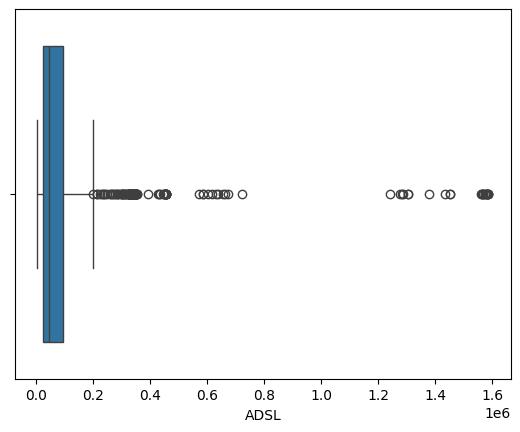

In [207]:
#Dibujar un diagrama de caja para verificar outliers
sns.boxplot(data=Accesos_Por_Tecnología, x="ADSL")
plt.show()

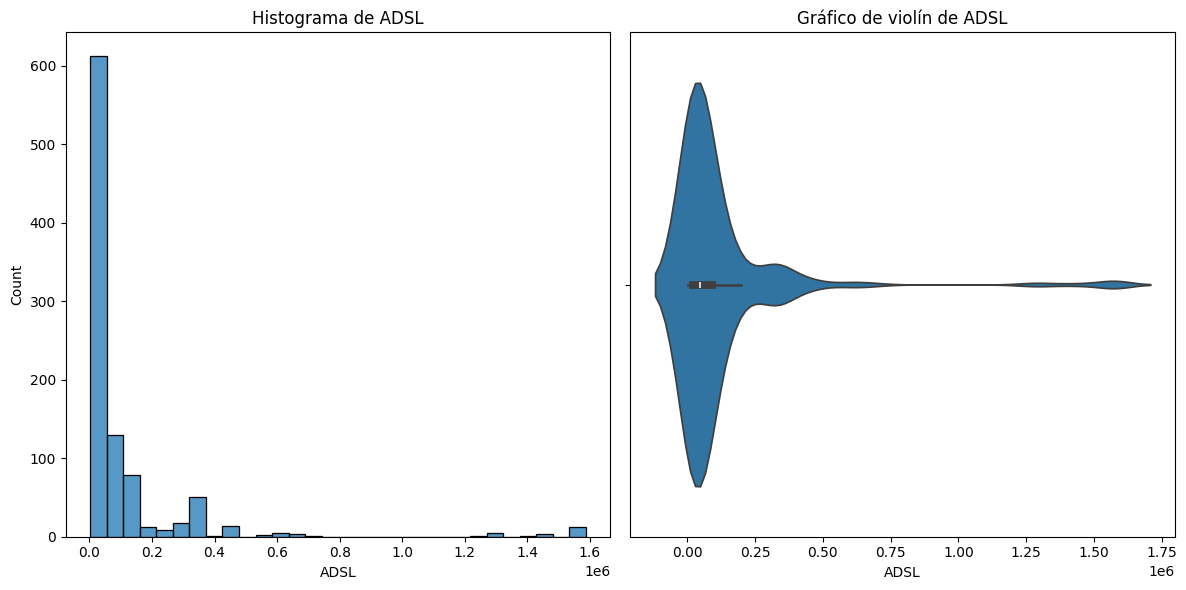

In [208]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histograma
sns.histplot(data=Accesos_Por_Tecnología, x="ADSL", bins=30, ax=axes[0])
axes[0].set_title('Histograma de ADSL')

# Gráfico de violín
sns.violinplot(data=Accesos_Por_Tecnología, x="ADSL", ax=axes[1])
axes[1].set_title('Gráfico de violín de ADSL')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

ESO NO SE VE BASTANTE BIEN CONTAMOS CON MUCHOS OUTLIERS MEJOR VERIFIQUEMOS CUALES SON ESTOS VALORES

In [209]:
Q1 = Accesos_Por_Tecnología["ADSL"].quantile(0.25)
Q3 = Accesos_Por_Tecnología["ADSL"].quantile(0.75)
IQR = Q3 - Q1

In [210]:
outliers = Accesos_Por_Tecnología[(Accesos_Por_Tecnología["ADSL"] < (Q1 - 1.5 * IQR)) | (Accesos_Por_Tecnología["ADSL"] > (Q3 + 1.5 * IQR))]

In [211]:
outliers

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2023,4,Buenos Aires,223391,2797700,1784593,137993,67943,5011620
24,2023,3,Buenos Aires,237705,2784175,1740239,137921,68197,4968237
48,2023,2,Buenos Aires,265537,2766463,1645945,138405,69138,4885488
72,2023,1,Buenos Aires,304583,2761043,1551074,132458,71770,4820928
96,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665
...,...,...,...,...,...,...,...,...,...
932,2014,2,Santa Fe,324101,178495,3085,6041,636,512358
936,2014,1,Buenos Aires,1567685,1000879,120960,16528,33824,2739876
937,2014,1,Capital Federal,445569,820161,17767,1866,14555,1299918
941,2014,1,Córdoba,336841,225769,347,3585,368,566910


ESO NO SE VE BASTANTE BIEN 129 VALORES QUE SE SALE DE LOS BIGOTES PROCEDEREMOS CON LA NORMALIZACION DE DATOS LOGARITMICA

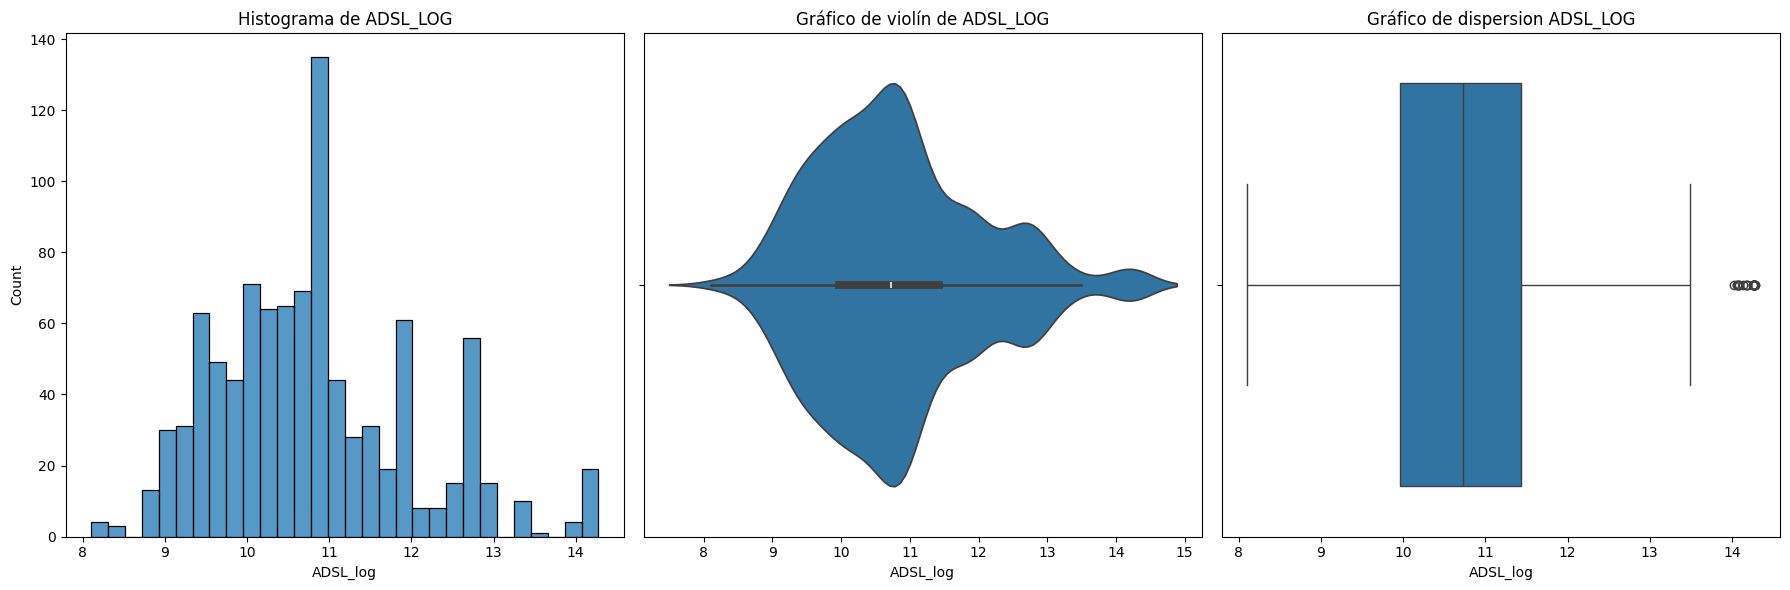

In [212]:
Accesos_Por_Tecnología["ADSL_log"] = np.log(Accesos_Por_Tecnología["ADSL"] + 1)  # +1 para evitar log(0)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma
sns.histplot(data=Accesos_Por_Tecnología, x="ADSL_log", bins=30, ax=axes[0])
axes[0].set_title('Histograma de ADSL_LOG')

# Gráfico de violín
sns.violinplot(data=Accesos_Por_Tecnología, x="ADSL_log", ax=axes[1])
axes[1].set_title('Gráfico de violín de ADSL_LOG')

#Gráfico de dispersion
sns.boxplot(data=Accesos_Por_Tecnología, x="ADSL_log",ax=axes[2])
axes[2].set_title('Gráfico de dispersion ADSL_LOG')
# Mostrar los gráficos
plt.tight_layout()
plt.show()

**Conclusiones:**

**Histograma:**

La distribución de ADSL_LOG parece ser unimodal, con un pico claro alrededor del valor 11.
Hay una asimetría hacia la derecha, con algunos valores altos pero mucho menos frecuentes.

**Gráfico de violín:**

Confirma la distribución observada en el histograma, con una alta densidad alrededor de 11.
Muestra que hay variabilidad en los datos, con una mayor concentración de valores alrededor de la mediana.

**Gráfico de dispersión:**

La mediana de ADSL_LOG está cerca de 11.
Hay varios valores atípicos (outliers) en el extremo superior, por encima de 13.

En resumen, la variable ADSL_LOG tiene una distribución asimétrica con una alta concentración de valores alrededor del 11, pero también presenta algunos valores atípicos altos.


|

|

|

--------------------------------------------------------------------------------

CARGAREMOS DE LOS DATOS DE EXCEL INTERNET LA HOJA PENETRACION_HOGARES QUE TIENE COMO DATO PRINCIPAL EL PORCENTAJE DE ACCESO A INTERNET POR CADA 100 HOGARES

In [213]:
df_penetracion_por_hogares = pd.read_excel('/content/drive/MyDrive/Proyecto_Henry/Data Analitycs/Data/Internet.xlsx', sheet_name="Penetracion-hogares")

In [214]:
df_penetracion_por_hogares.head(10)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2023,4,Buenos Aires,80.96
1,2023,4,Capital Federal,117.02
2,2023,4,Catamarca,68.63
3,2023,4,Chaco,44.35
4,2023,4,Chubut,84.96
5,2023,4,Córdoba,90.67
6,2023,4,Corrientes,52.56
7,2023,4,Entre Ríos,69.94
8,2023,4,Formosa,39.23
9,2023,4,Jujuy,57.78


In [215]:
df_penetracion_por_hogares.tail()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
955,2014,1,Santa Cruz,28.939093
956,2014,1,Santa Fe,47.847663
957,2014,1,Santiago Del Estero,16.309924
958,2014,1,Tierra Del Fuego,63.965926
959,2014,1,Tucumán,33.420975


VAMOS A REDONDEAR LOS VALORES DE LA COLUMNA ACCESOS POR CADA 100 HOGARES

In [216]:
df_penetracion_por_hogares["Accesos por cada 100 hogares"] = df_penetracion_por_hogares["Accesos por cada 100 hogares"].round(2)

In [217]:
df_penetracion_por_hogares.tail()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
955,2014,1,Santa Cruz,28.94
956,2014,1,Santa Fe,47.85
957,2014,1,Santiago Del Estero,16.31
958,2014,1,Tierra Del Fuego,63.97
959,2014,1,Tucumán,33.42


NOS PERCATAMOS QUE CUENTA CON OUTLIERS POR LA PRIMERA IMPRESION DE LA TABLA COMO UNA PROVINCIA PUEDE TENER UN CRECIMIENTO EN CONTRATACION DE SERVICIO DE INTERNET EN UN 117%

In [218]:
Q1_penetracion_hogar = df_penetracion_por_hogares["Accesos por cada 100 hogares"].quantile(0.25)
Q3_penetracion_hogar= df_penetracion_por_hogares["Accesos por cada 100 hogares"].quantile(0.75)
IQR_penetracion_hogar = Q3 - Q1

In [219]:
outliers_penetracion_hogar = df_penetracion_por_hogares[(df_penetracion_por_hogares["Accesos por cada 100 hogares"] < (Q1 - 1.5 * IQR)) | (df_penetracion_por_hogares["Accesos por cada 100 hogares"] > (Q3 + 1.5 * IQR))]

In [220]:
outliers_penetracion_hogar

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


VAYA NO SE ENCONTRARON OUTLIERS CON EL CALCULO MEJOR AREMOS ALGO MAS SIMPLE YA QUE TENEMOS EN CUENTA QUE EN ESTADISTICA NO EXISTE UN MAYOR CRECIMIENTO ARRIBA DEL 100% NI MENOR AL 0% ENTONCES FILTRAREMOS LOS DATOS PARA ENCONTRAR ESOS VALORES QUE ESTAN FUERAN DE LOS VALORES PERMITIDOS

In [221]:
df_outliers_penetracion_hogares = df_penetracion_por_hogares[(df_penetracion_por_hogares["Accesos por cada 100 hogares"] > 100)]

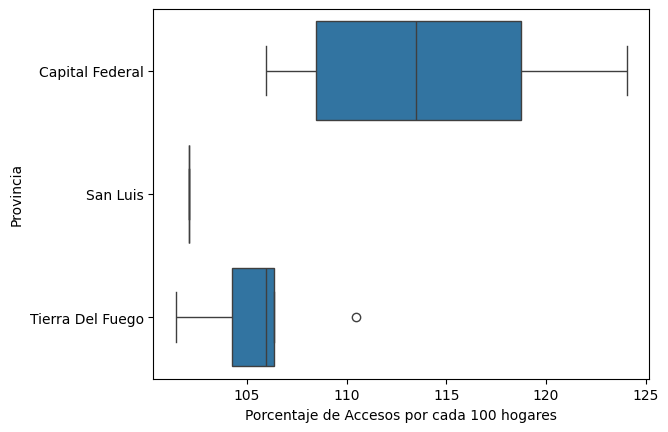

In [222]:
sns.boxplot(data=df_outliers_penetracion_hogares, x="Accesos por cada 100 hogares", y="Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

OUTLIERS ENCONTRADOS COMO MANEJAREMOS ESTO LOS ELIMINAREMOS? PUES NO, SERIAN DATOS QUE POR MAS POCAS FILAS QUE SEAN REPRESENTAN EL CRECIMIENTO DE LA CONTRATACION DEL SERVICIO DE INTERNET POR AÑO POR LO QUE PARA MITIGARLOS USAREMOS EL PROMEDIO DE CRECIMIENTO DE ESTAS 3 PROVINCIAS DEJANDO DE LADO LOS OUTLIERS EN EL CALCULO

In [223]:
df_penetracion_por_hogares["Provincia"].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [224]:
df_penetracion_por_hogares[(df_penetracion_por_hogares["Accesos por cada 100 hogares"] <= 120) & (df_penetracion_por_hogares["Provincia"] == "Capital Federal")]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
1,2023,4,Capital Federal,117.02
25,2023,3,Capital Federal,116.40
49,2023,2,Capital Federal,115.48
169,2022,1,Capital Federal,111.80
193,2021,4,Capital Federal,111.27
217,2021,3,Capital Federal,111.27
241,2021,2,Capital Federal,110.14
265,2021,1,Capital Federal,108.42
289,2020,4,Capital Federal,108.31
313,2020,3,Capital Federal,107.68


TENEMOS EL GRAN PROBLEMA QUE TODOS LOS DATOS DE LA PROVINCIA CAPITAL FEDERAL SON OUTLIERS IMPOSIBILITANDO EL USO DE SU PROMEDIO PARA REMPLAZAR ESTOS VALORES EN CASOS EMPRESARIALES SE LE PODRIA PEDIR AL QUE RECOPILO LOS DATOS UNA SEGUNDA VERIFICACION O ENLACE DE SUS DATOS EXTRAIDOS PERO EN ESTE CASO DE PROYECTO DADO QUE LOS MEDIOS SON CORTOS USAREMOS EL VALOR DEL PRIMER CUARTIL

In [225]:
df_penetracion_por_hogares[(df_penetracion_por_hogares["Accesos por cada 100 hogares"] < 100)]["Accesos por cada 100 hogares"].quantile(0.25)

32.582499999999996

RESTAREMOS EL VALOR DEL PRIMER CUARTIL A TODOS LOS OUTLIERS DE CAPITAL FEDERAL

In [226]:
df_penetracion_por_hogares.loc[df_penetracion_por_hogares["Accesos por cada 100 hogares"] > 100, "Accesos por cada 100 hogares"] -= 32.58

In [227]:
df_penetracion_por_hogares[df_penetracion_por_hogares["Accesos por cada 100 hogares"] > 100]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


ESO FUNCIONO BASTANTE BIEN AHORA VEAMOS SI HAY OUTLIERS

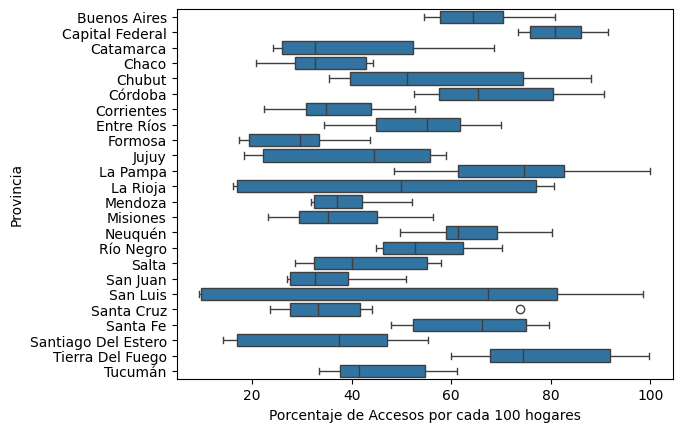

In [228]:
sns.boxplot(data=df_penetracion_por_hogares, x="Accesos por cada 100 hogares", y="Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

ESO LUCE BASTANTE BIEN PERO TENEMOS A UNA PROVINCIA QUE PARECE QUE UN VALOR SE LE ESTA ESCAPANDO OBSERVEMOS MAS DE CERCA

In [229]:
df_penetracion_por_hogares[(df_penetracion_por_hogares["Accesos por cada 100 hogares"] > 40) & (df_penetracion_por_hogares["Provincia"] == "Santa Cruz")]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
19,2023,4,Santa Cruz,73.75
43,2023,3,Santa Cruz,40.89
67,2023,2,Santa Cruz,41.66
91,2023,1,Santa Cruz,43.42
115,2022,4,Santa Cruz,43.53
139,2022,3,Santa Cruz,43.19
163,2022,2,Santa Cruz,43.15
187,2022,1,Santa Cruz,43.34
211,2021,4,Santa Cruz,43.05
235,2021,3,Santa Cruz,43.75


ESTE NO PARECE SER UN PROBLEMA YA QUE SI BIEN ES UN VALOR DE CRECIMIENTO BASTANTE EXTREMO HAY ANALISIS QUE PUEDEN VERIFICAR LA VERACIDAD DE ESTE VALOR PERO DENTRO DE ESTE PROYECTO NO VAMOS A INDAGAR SOBRE ESO

In [230]:
df_penetracion_por_hogares.isna().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

NO CONTAMOS CON VALORES NULOS

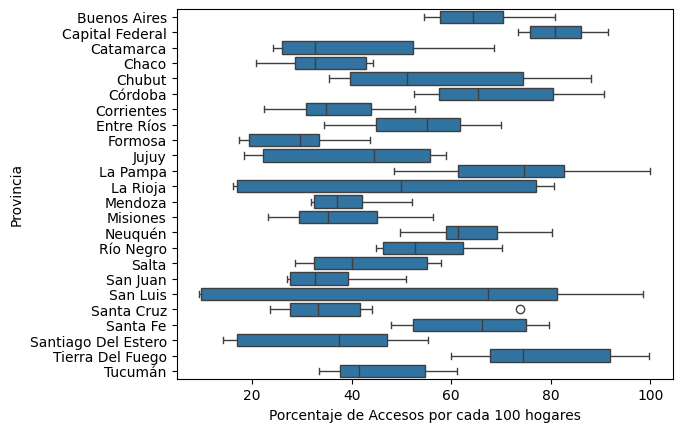

In [231]:
sns.boxplot(data=df_penetracion_por_hogares, x="Accesos por cada 100 hogares", y="Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

El gráfico que se presenta es un diagrama de cajas (box plot) que muestra la distribución de los accesos por cada 100 hogares en varias provincias argentinas.Las conclusiones son:

**Variabilidad de Accesos:**

Las provincias presentan una gran variabilidad en cuanto a los accesos por cada 100 hogares.
Algunas provincias tienen una dispersión más amplia (e.g., Buenos Aires, Córdoba, Santa Fe), mientras que otras tienen una dispersión más estrecha (e.g., La Rioja, Mendoza).

**Medianas y Rangos Intercuartílicos:**

Provincias como Buenos Aires y Córdoba tienen medianas más altas, indicando un mayor número de accesos por cada 100 hogares.
Provincias como Formosa y Santiago del Estero tienen medianas más bajas, indicando un menor número de accesos.

**Valores Atípicos:**

Se observan algunos valores atípicos, como en las provincias de Formosa y San Luis, que indican valores de acceso significativamente diferentes del resto de los datos.

**Comparaciones Entre Provincias:**

Buenos Aires y Córdoba parecen tener los mayores niveles de accesos por cada 100 hogares.
Provincias como La Pampa y Tucumán tienen medianas similares, pero diferentes niveles de variabilidad.

**Rangos de Accesos:**

La mayoría de las provincias tienen rangos de accesos que varían considerablemente, lo que sugiere diferencias significativas en la conectividad dentro de las mismas provincias.
En resumen, el gráfico muestra una diversidad considerable en los accesos por cada 100 hogares entre las diferentes provincias argentinas, con algunas provincias destacándose por tener una mayor conectividad y otras con menos accesos. La variabilidad dentro de las provincias también es notable, lo que indica disparidades internas en el acceso a servicios.

|

|

|

--------------------------------------------------------------------------------

In [232]:
df_penetracion_por_poblacion = pd.read_excel('/content/drive/MyDrive/Proyecto_Henry/Data Analitycs/Data/Internet.xlsx', sheet_name="Penetración-poblacion")

In [233]:
df_penetracion_por_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023,4,Buenos Aires,27.68
1,2023,4,Capital Federal,47.80
2,2023,4,Catamarca,17.46
3,2023,4,Chaco,11.85
4,2023,4,Chubut,26.04


In [234]:
df_penetracion_por_poblacion.tail()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
955,2014,1,Santa Cruz,8.677327
956,2014,1,Santa Fe,15.077801
957,2014,1,Santiago Del Estero,4.058899
958,2014,1,Tierra Del Fuego,19.104921
959,2014,1,Tucumán,8.307215


In [235]:
df_penetracion_por_poblacion["Accesos por cada 100 hab"] = df_penetracion_por_poblacion["Accesos por cada 100 hab"].round(2)

In [236]:
df_penetracion_por_poblacion

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2023,4,Buenos Aires,27.68
1,2023,4,Capital Federal,47.80
2,2023,4,Catamarca,17.46
3,2023,4,Chaco,11.85
4,2023,4,Chubut,26.04
...,...,...,...,...
955,2014,1,Santa Cruz,8.68
956,2014,1,Santa Fe,15.08
957,2014,1,Santiago Del Estero,4.06
958,2014,1,Tierra Del Fuego,19.10


In [237]:
df_penetracion_por_poblacion.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

NO CONTAMOS CON VALORES NULOS

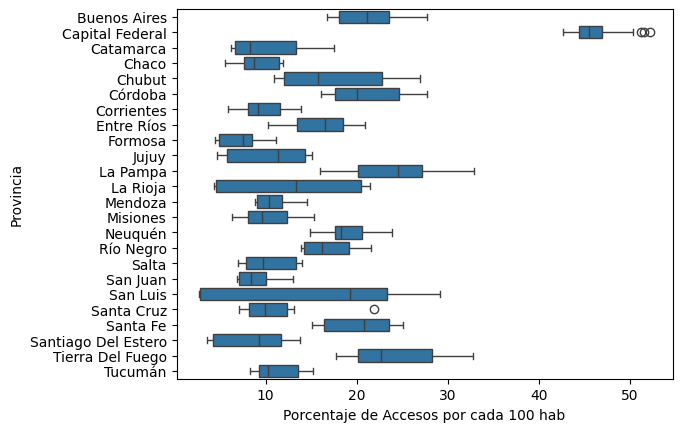

In [238]:
# Crear el diagrama de caja utilizando seaborn
sns.boxplot(data=df_penetracion_por_poblacion, x="Accesos por cada 100 hab", y="Provincia")

# Etiqueta para el eje x
plt.xlabel("Porcentaje de Accesos por cada 100 hab")

# Mostrar el gráfico
plt.show()

In [239]:
df_penetracion_por_poblacion[df_penetracion_por_poblacion["Provincia"] == "Capital Federal"]

,Año,Trimestre,Provincia,Accesos por cada 100 hab
1,2023,4,Capital Federal,47.80
25,2023,3,Capital Federal,47.60
49,2023,2,Capital Federal,47.27
73,2023,1,Capital Federal,50.23
97,2022,4,Capital Federal,50.35
121,2022,3,Capital Federal,50.22
145,2022,2,Capital Federal,49.87
169,2022,1,Capital Federal,46.01
193,2021,4,Capital Federal,45.85
217,2021,3,Capital Federal,45.90


AUQUE EVIDENCIAMOS QUE PODRIA HABER OUTLIERS EN LA PROVINCIA CAPITAL FEDERAL EN EL BLOX PLOT EN LA TABLA DE VALORES NO SE PRESENTA ALGUN VALOR FUERA DE LUGAR ESTO PODRIA DEBERSE A QUE ESTA PROVINCIA TUVO UN CRECIMIENTO EXPONENCIAL.

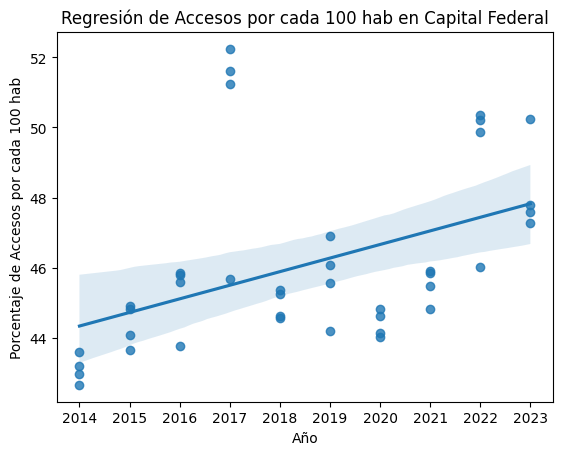

In [240]:
# Filtrar datos para la provincia de "Capital Federal"
data_capital = df_penetracion_por_poblacion[df_penetracion_por_poblacion["Provincia"] == "Capital Federal"]

# Crear el gráfico de regresión utilizando seaborn
sns.regplot(x="Año", y="Accesos por cada 100 hab", data=data_capital)

# Establecer el rango de los ticks en el eje x
plt.xticks(range(2014, 2024))

# Etiquetas para los ejes y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Accesos por cada 100 hab')
plt.title('Regresión de Accesos por cada 100 hab en Capital Federal')

# Mostrar el gráfico
plt.show()

In [241]:
df_penetracion_por_poblacion[(df_penetracion_por_poblacion["Provincia"] == "Capital Federal") & (df_penetracion_por_poblacion["Año"] == 2017)]

,Año,Trimestre,Provincia,Accesos por cada 100 hab
577,2017,4,Capital Federal,51.62
601,2017,3,Capital Federal,51.24
625,2017,2,Capital Federal,52.24
649,2017,1,Capital Federal,45.69


In [242]:
df_penetracion_por_poblacion[(df_penetracion_por_poblacion["Provincia"] == "Capital Federal") & (df_penetracion_por_poblacion["Año"] == 2020)]

,Año,Trimestre,Provincia,Accesos por cada 100 hab
289,2020,4,Capital Federal,44.83
313,2020,3,Capital Federal,44.62
337,2020,2,Capital Federal,44.15
361,2020,1,Capital Federal,44.02


**CONCLUSIONES:**

**Tendencia General:**
La línea de regresión muestra una tendencia ascendente a lo largo de los años, lo que indica que, en general, el número de accesos por cada 100 habitantes ha aumentado en Capital Federal durante este período.

**Variabilidad:**
Los puntos de datos individuales muestran una considerable dispersión alrededor de la línea de regresión, lo que sugiere que hay variabilidad en los datos de año a año.

**Intervalo de Confianza:**
La sombra azul alrededor de la línea de regresión representa el intervalo de confianza. A medida que se aleja del inicio del período, la banda se ensancha, indicando mayor incertidumbre en la predicción de la tendencia a futuro.

**Accesos Máximos y Mínimos:**
A lo largo de los años, se observan picos en ciertos años, como en 2015 y 2023, donde los accesos alcanzan más de 52 por cada 100 habitantes. Por otro lado, hay años donde los accesos son considerablemente menores.

En resumen, el gráfico indica que los accesos por cada 100 habitantes han mostrado una tendencia creciente en Capital Federal durante el período estudiado, aunque con variaciones significativas en algunos años.

|

|

|

--------------------------------------------------------------------------------

CARGAMOS DE LAS HOJAS DE LOS DATOS DE EXCEL PENETRACION-TOTALES QUE TIENE COMO DATOS PRINCIPALES EL PORCENTAJE TOTAL DE ACCESO A INTERNET POR CADA 100 HABITANTES COMO TAMBIEN EL PORCENTAJE TOTAL DE ACCESO A INTERNET POR CADA 100 HOGARES

In [243]:
df_Penetracion_totales = pd.read_excel('/content/drive/MyDrive/Proyecto_Henry/Data Analitycs/Data/Internet.xlsx', sheet_name="Penetracion-totales")

In [244]:
df_Penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2023,4,78.56,24.66,Oct-Dic 2023
1,2023,3,77.84,24.41,Jul-Sept 2023
2,2023,2,77.02,24.14,Abr-Jun 2023
3,2023,1,77.20,24.17,Ene-Mar 2023
4,2022,4,77.21,24.15,Oct-Dic 2022


In [245]:
df_Penetracion_totales.tail()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
35,2015,1,51.364586,15.677234,Ene-Mar 2015
36,2014,4,50.499788,15.394677,Oct-Dic 2014
37,2014,3,50.672368,15.428769,Jul-Sept 2014
38,2014,2,49.861428,15.163908,Abr-Jun 2014
39,2014,1,49.545821,15.050104,Ene-Mar 2014


In [246]:
df_Penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] = df_Penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] / 100

In [247]:
df_Penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]] = df_Penetracion_totales[["Accesos por cada 100 hogares","Accesos por cada 100 hab"]].round(3)

PARA PODER DIBUJAR UN GRAFICO DE CUAL FUE SU CRECIMIENTO DE LA CONTRATACION DEL SERVICIO DE INTERNET NORMALICE LOS DATOS DE LA COLUMNA ACCESOS POR CADA 100 HOGARES SACANDO EL PORCENTAJE

In [248]:
df_Penetracion_totales.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2023,4,0.786,0.247,Oct-Dic 2023
1,2023,3,0.778,0.244,Jul-Sept 2023
2,2023,2,0.770,0.241,Abr-Jun 2023
3,2023,1,0.772,0.242,Ene-Mar 2023
4,2022,4,0.772,0.242,Oct-Dic 2022


In [249]:
df_Penetracion_totales.isna().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [250]:
df_Penetracion_totales_tendencia = df_Penetracion_totales.groupby(by="Año")["Accesos por cada 100 hab"].sum()

In [251]:
df_Penetracion_totales_tendencia = df_Penetracion_totales_tendencia.reset_index()

In [252]:
df_Penetracion_totales_tendencia["Accesos por cada 100 hab"] = df_Penetracion_totales_tendencia["Accesos por cada 100 hab"] / 4

AGRUPE LOS DATOS POR AÑO Y RESETE EL INDEX PARA TENER LA COLUMNA DE ACCESO POR CADA 100 HABITANTES SIN ESA LINEA DE CODIGO NO TENDRIAMOS TAL COLUMNA LUEGO REALICE LA DIVISION ENTRE 4 ¿POR QUE? POR QUE EL PORCENTAJE DE CRECIMIENTO VA POR TRIMESTRE ENTONCES HICE LA SUMA DE CRECIMIENTO DE LOS 4 TRIMESTRES POR AÑO PARA LUEGO HACER DIVISION ENTRE LA CANTIDAD DE TRIMESTRE PARA SACAR EL PROMEDIO DE CRECIMIENTO POR AÑO

In [253]:
df_Penetracion_totales_tendencia

,Año,Accesos por cada 100 hab
0,2014,0.15275
1,2015,0.15925
2,2016,0.16350
3,2017,0.17200
4,2018,0.18500
5,2019,0.19800
6,2020,0.20250
7,2021,0.21850
8,2022,0.23725
9,2023,0.24350


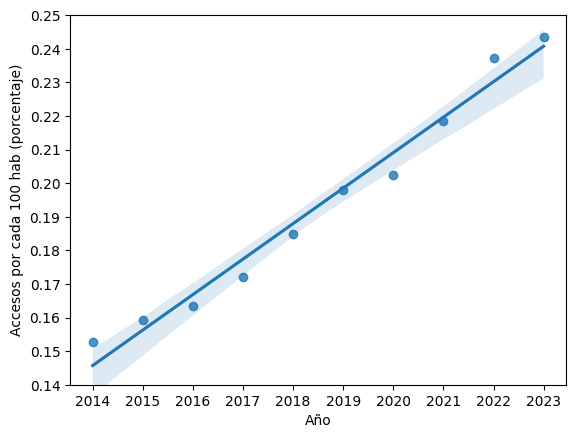

In [254]:
# Crear el gráfico
sns.regplot(x="Año", y="Accesos por cada 100 hab", data=df_Penetracion_totales_tendencia)

# Establecer límites del eje y
plt.ylim(0.14, 0.24)

# Establecer límites del eje x


# Establecer las etiquetas de los ejes
plt.xlabel("Año")
plt.ylabel("Accesos por cada 100 hab (porcentaje)")

# Establecer los ticks de los ejes
plt.xticks(range(2014, 2024))
plt.yticks([0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.20, 0.21, 0.22, 0.23, 0.24, 0.25])

# Mostrar el gráfico
plt.show()


CADA PUNTO REPRESENTA EL PORCENTAJE DE CRECIMIENTO DE CADA AÑO TENIENDO UN CRECIMIENTO POSITIVO

PERO ESTE ES EN VERDAD UN GRAFICO QUE PUEDA PROPORCIONARNOS INFORMACION VALIOSA? SI BIEN PODEMOS OBSERVAR UN CRECIMIENTO POSITIVO PERO LA VERDAD PARA MAYOR PROFUNDIDAD COMPARAREMOS EL CRECIMIENTO DE CADA TRIMESTRE POR AÑO

In [255]:
df_Penetracion_totales_comparacion = df_Penetracion_totales[["Año","Trimestre","Accesos por cada 100 hab"]]

In [256]:
df_penetracion_trim1 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 1]
df_penetracion_trim2 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 2]
df_penetracion_trim3 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 3]
df_penetracion_trim4 = df_Penetracion_totales_comparacion[df_Penetracion_totales_comparacion['Trimestre'] == 4]

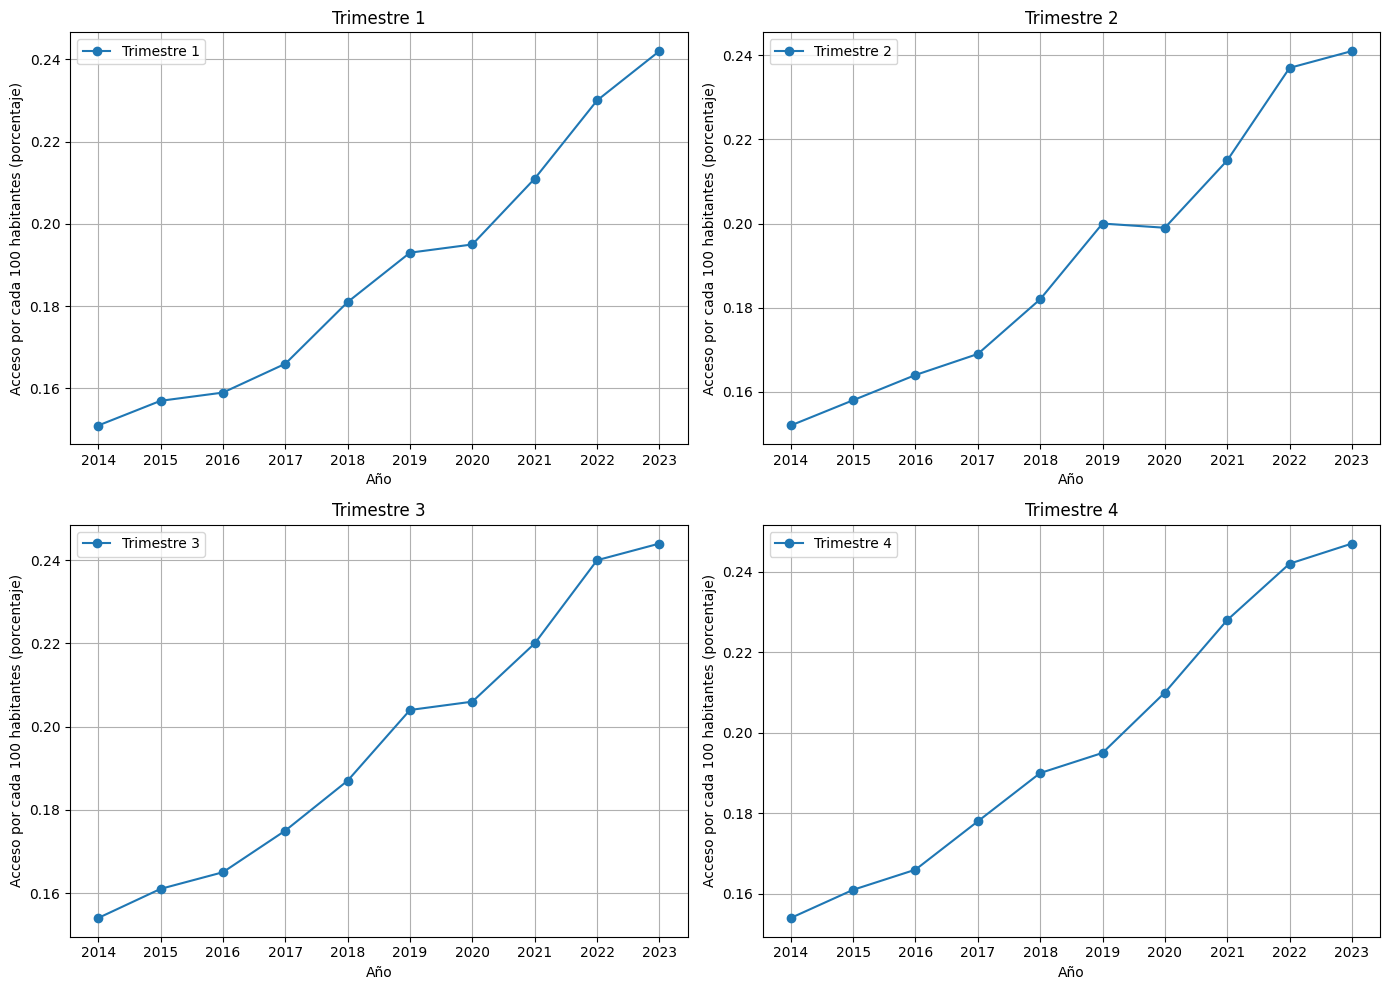

In [257]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Trimestre 1 vs Trimestre 2
axs[0, 0].plot(df_penetracion_trim1['Año'], df_penetracion_trim1['Accesos por cada 100 hab'], marker='o', label='Trimestre 1')
axs[0, 0].set_title('Trimestre 1')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[0, 0].set_xticks(range(2014, 2024))
axs[0, 0].legend()
axs[0, 0].grid(True)

# Trimestre 3 vs Trimestre 4
axs[0, 1].plot(df_penetracion_trim2['Año'], df_penetracion_trim2['Accesos por cada 100 hab'], marker='o', label='Trimestre 2')
axs[0, 1].set_title('Trimestre 2')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[0, 1].set_xticks(range(2014, 2024))
axs[0, 1].legend()
axs[0, 1].grid(True)

# Trimestre 1 vs Trimestre 3
axs[1, 0].plot(df_penetracion_trim3['Año'], df_penetracion_trim3['Accesos por cada 100 hab'], marker='o', label='Trimestre 3')
axs[1, 0].set_title('Trimestre 3')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[1, 0].set_xticks(range(2014, 2024))
axs[1, 0].legend()
axs[1, 0].grid(True)

# Trimestre 2 vs Trimestre 4
axs[1, 1].plot(df_penetracion_trim4['Año'], df_penetracion_trim4['Accesos por cada 100 hab'], marker='o', label='Trimestre 4')
axs[1, 1].set_title('Trimestre 4')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[1, 1].set_xticks(range(2014, 2024))
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

## Conclusiones del Análisis de los Gráficos de Accesos por Trimestre

El conjunto de gráficos muestra la evolución del porcentaje de accesos por cada 100 habitantes, dividido por trimestres, desde el año 2014 hasta el 2023. Las conclusiones basadas en estos gráficos:

### 1. Tendencia General
- En los cuatro trimestres, se observa una tendencia ascendente en el porcentaje de accesos por cada 100 habitantes a lo largo de los años. Esto indica un crecimiento continuo y sostenido en los accesos.

### 2. Comparación entre Trimestres
- Todos los trimestres muestran una tendencia similar con un crecimiento constante desde 2014 hasta 2023.
- La pendiente de crecimiento parece ser bastante consistente entre los trimestres, lo que sugiere que no hay un trimestre en particular que sea significativamente diferente en términos de crecimiento de accesos.

### 3. Puntos de Crecimiento Notable
- A partir de 2017, todos los trimestres muestran un aumento más pronunciado en el porcentaje de accesos.
- Entre 2020 y 2021, hay un notable incremento en el crecimiento, lo que puede estar asociado a factores como la pandemia de COVID-19, que pudo haber impulsado una mayor demanda de accesos debido a la necesidad de trabajar y estudiar desde casa.

### 4. Año 2023
- El año 2023 muestra el valor más alto en cada trimestre, alcanzando alrededor del 0.24% de accesos por cada 100 habitantes.

### 5. Estacionalidad
- No parece haber una estacionalidad marcada en los datos, ya que el crecimiento es relativamente uniforme entre los trimestres. Esto sugiere que los accesos han crecido de manera constante a lo largo de los años sin grandes fluctuaciones estacionales.

En resumen, los gráficos muestran un crecimiento continuo y sostenido en el porcentaje de accesos por cada 100 habitantes en Capital Federal a lo largo de los años, con un incremento notable a partir de 2017 y valores máximos en 2023. La tendencia es similar en los cuatro trimestres, sin una estacionalidad significativa.
